In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json

In [44]:
df = pd.read_csv("data.csv")

In [45]:
df.head()

,agent1,agent2,final_theta1,final_theta2,game,gamma,generations_until_stability,initial_theta1,initial_theta2,population_progress,theta_progress
0,AlwaysDefect,AlwaysCoorperate,0.582437,0.428814,Prisoner's Dilemma,0.95,45,0.50,0.50,"[[450, 450], [452, 447], [457, 442], [459, 440...","[[0.5, 0.5], [0.5025685674281322, 0.4974314325..."
1,AlwaysDefect,AlwaysCoorperate,0.668056,0.278104,Prisoner's Dilemma,0.95,439,0.25,0.75,"[[225, 675], [224, 675], [227, 668], [232, 653...","[[0.25, 0.75], [0.24980782572019827, 0.7505765..."
2,AlwaysDefect,AlwaysCoorperate,0.712149,0.262852,Prisoner's Dilemma,0.95,229,0.75,0.25,"[[675, 225], [673, 225], [671, 226], [669, 226...","[[0.75, 0.25], [0.7478794813932976, 0.25070683..."
3,AlwaysDefect,AlwaysCoorperate,0.279206,0.315058,Prisoner's Dilemma,0.95,74,0.10,0.90,"[[90, 810], [93, 781], [96, 749], [100, 722], ...","[[0.1, 0.9], [0.1035222610098715, 0.8682996509..."
4,AlwaysDefect,AlwaysCoorperate,0.499989,0.179284,Prisoner's Dilemma,0.95,343,0.90,0.10,"[[810, 90], [805, 90], [802, 90], [800, 91], [...","[[0.9, 0.1], [0.8945444703443332, 0.1006061699..."


In [46]:
df.describe()

,final_theta1,final_theta2,gamma,generations_until_stability,initial_theta1,initial_theta2
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.435582,0.445923,0.970000,120.461111,0.500000,0.500000
std,0.213433,0.214355,0.020056,194.929822,0.299161,0.299161
min,0.099263,0.095227,0.950000,1.000000,0.100000,0.100000
25%,0.264986,0.268789,0.950000,7.750000,0.250000,0.250000
50%,0.404598,0.445701,0.970000,50.500000,0.500000,0.500000
75%,0.514707,0.540701,0.990000,176.250000,0.750000,0.750000
max,0.937929,0.905837,0.990000,1661.000000,0.900000,0.900000


## Use these graphs to find which combinations are 'interesting'

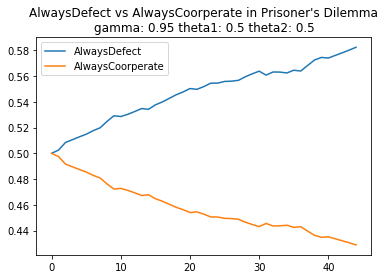

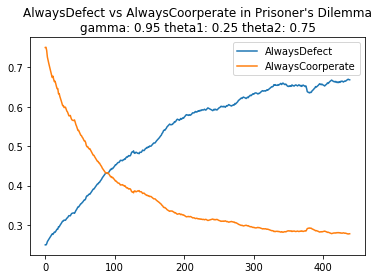

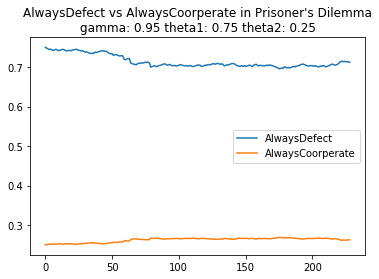

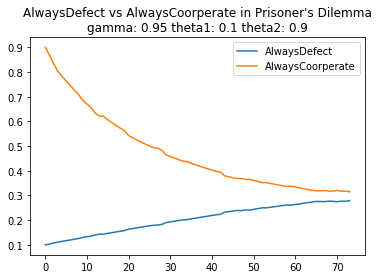

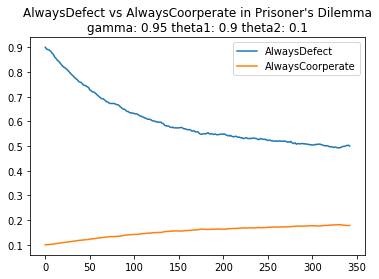

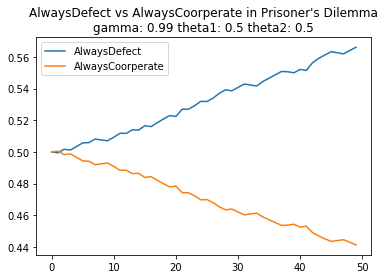

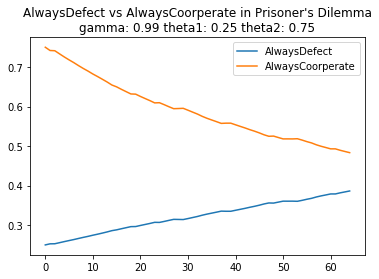

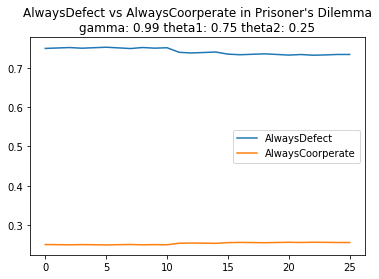

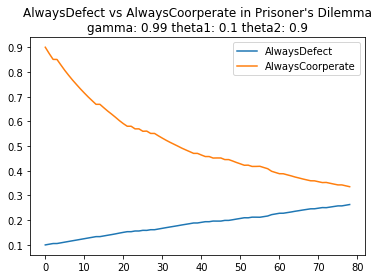

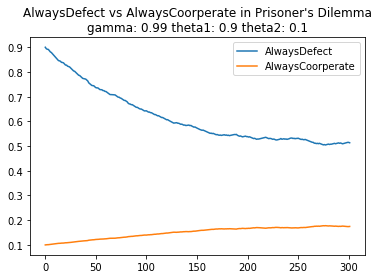

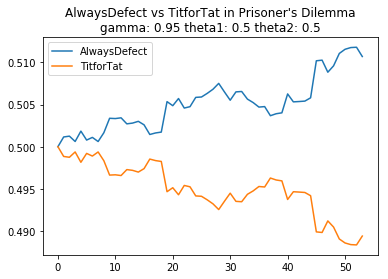

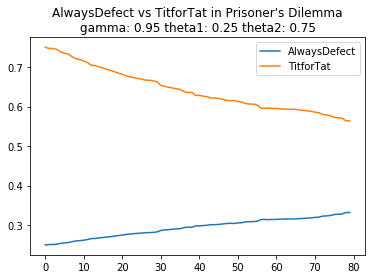

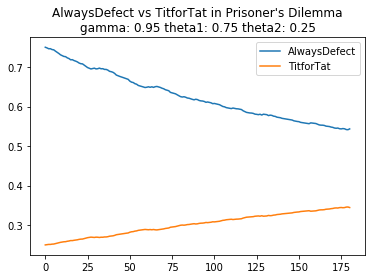

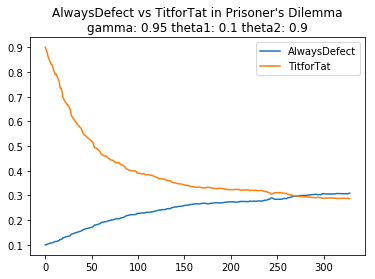

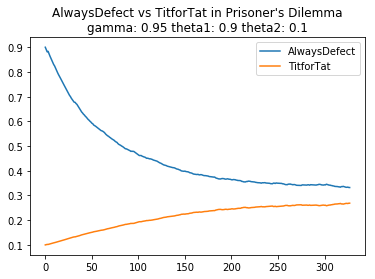

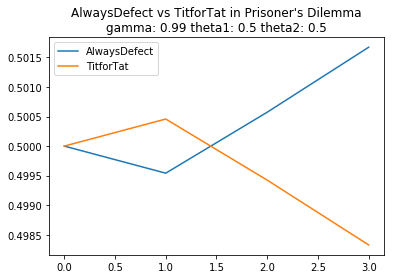

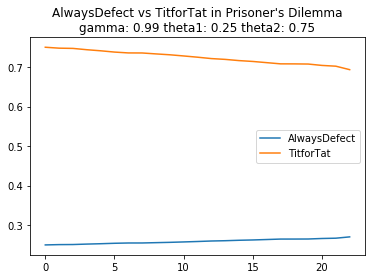

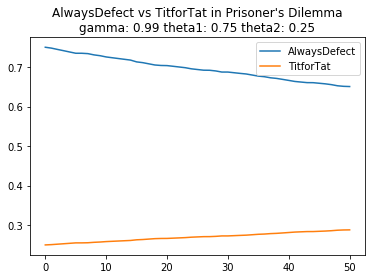

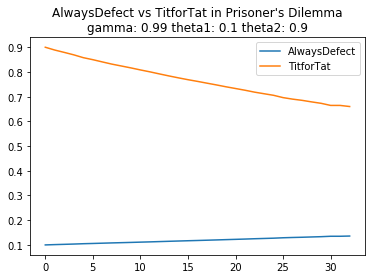

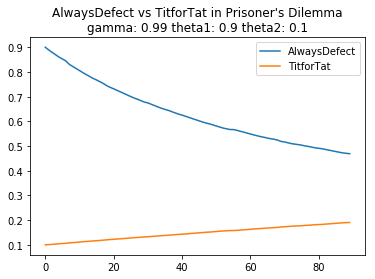

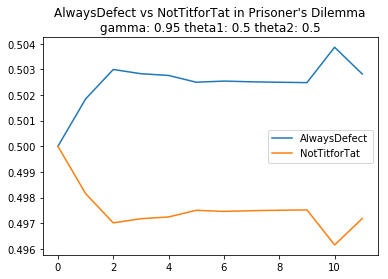

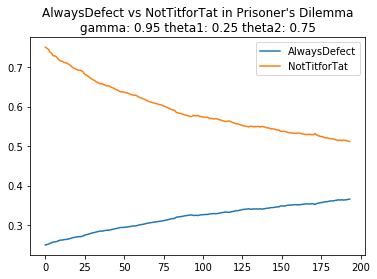

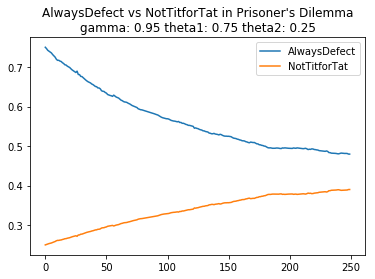

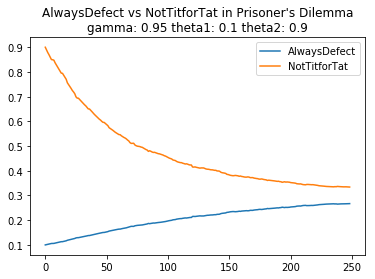

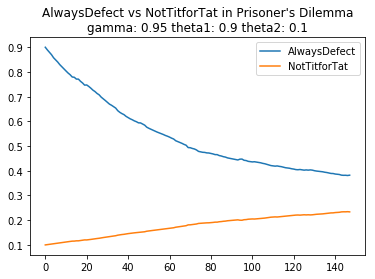

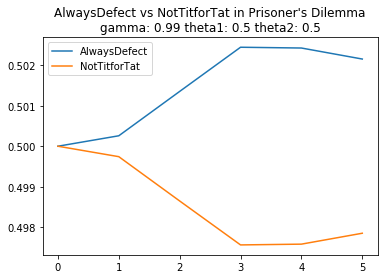

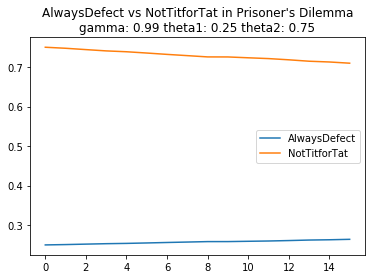

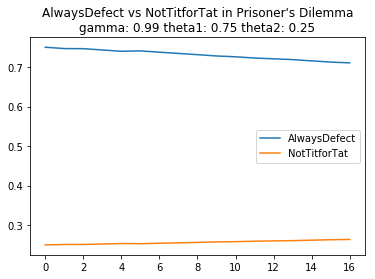

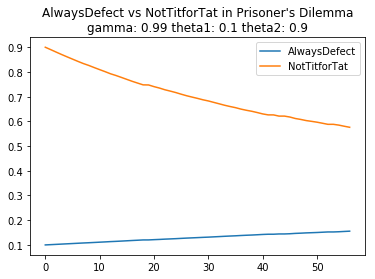

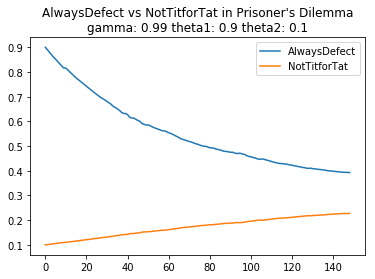

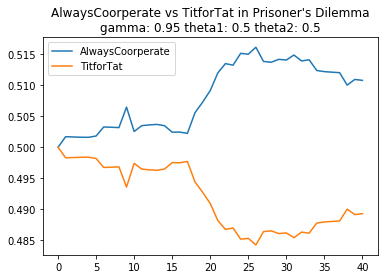

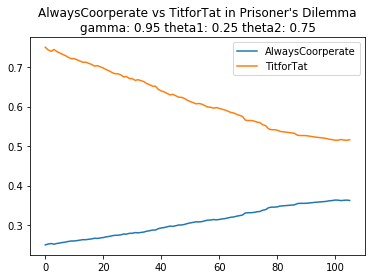

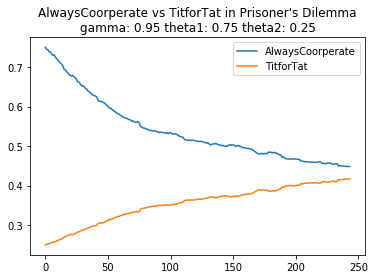

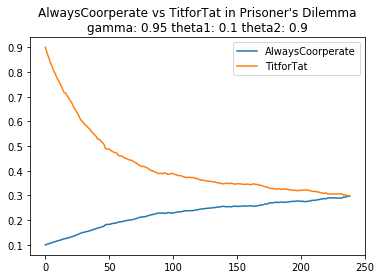

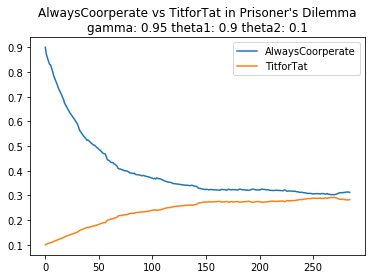

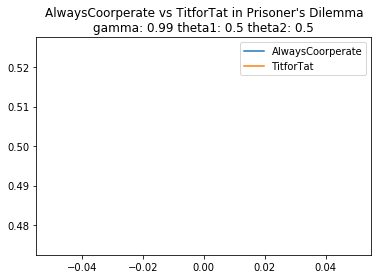

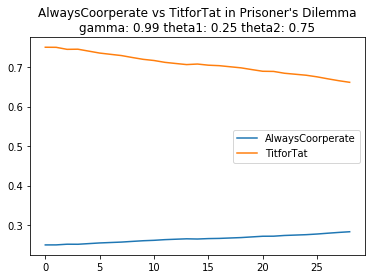

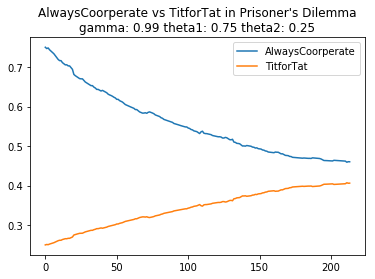

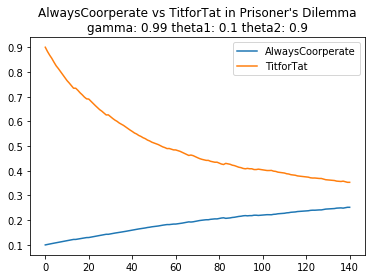

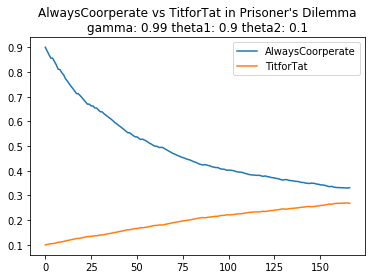

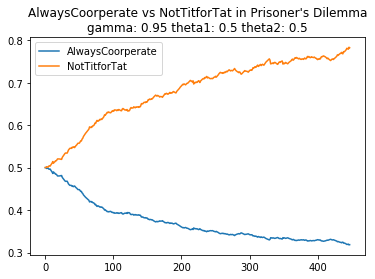

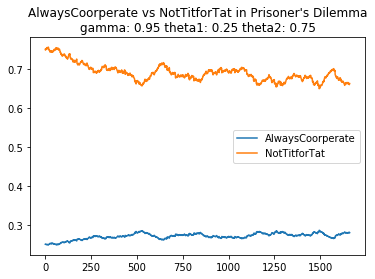

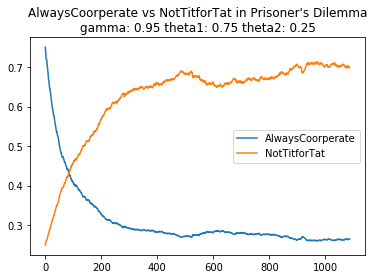

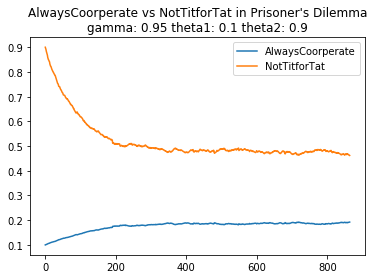

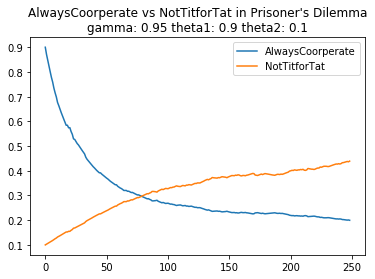

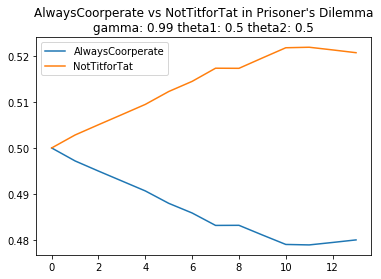

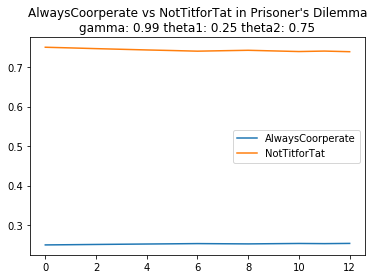

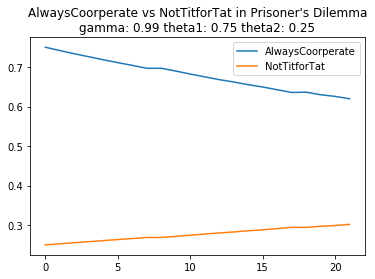

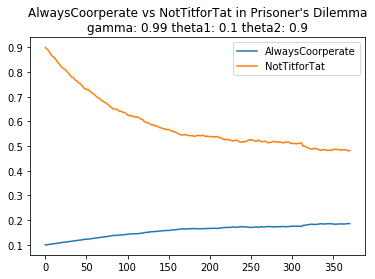

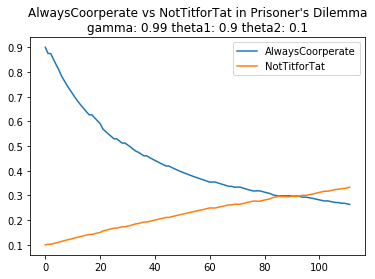

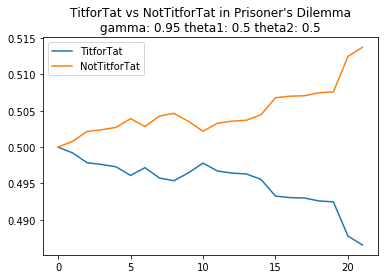

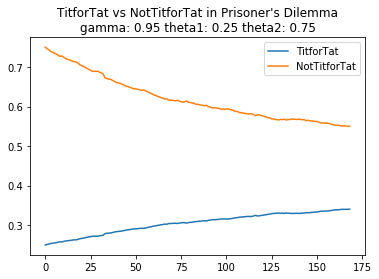

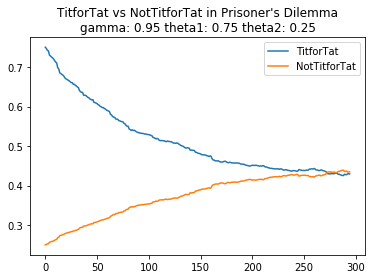

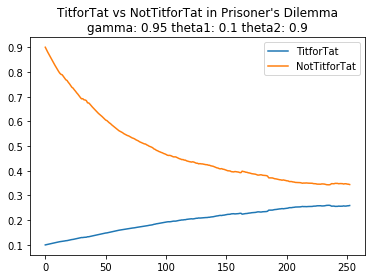

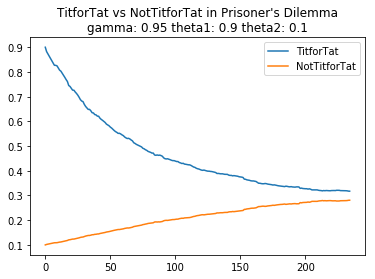

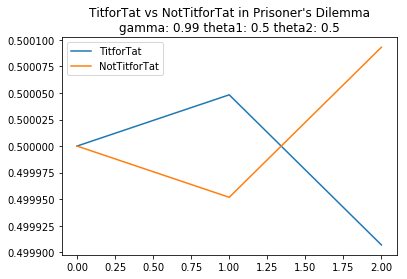

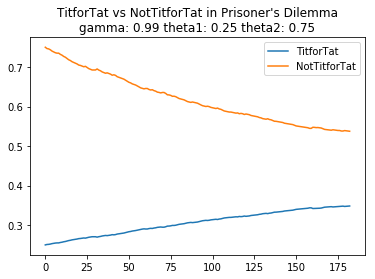

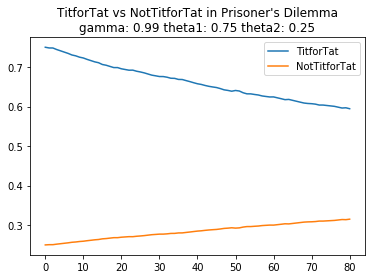

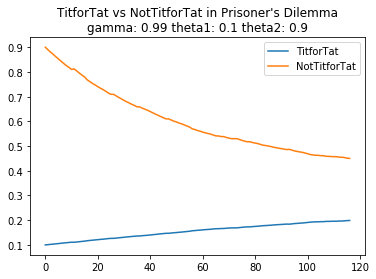

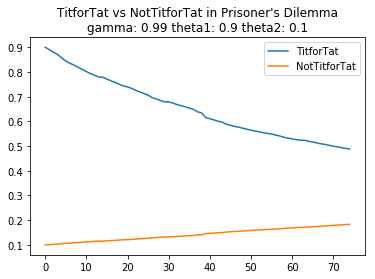

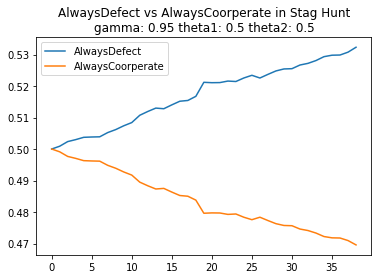

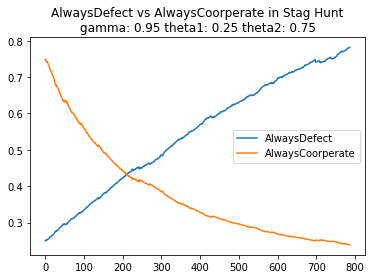

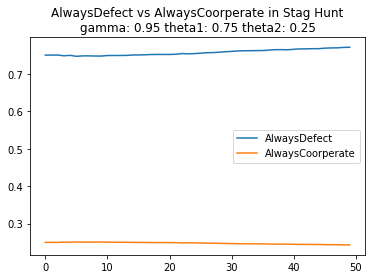

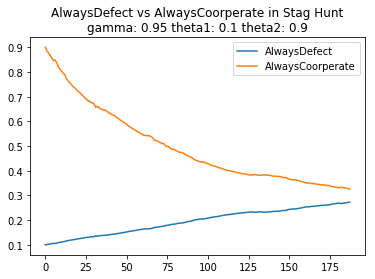

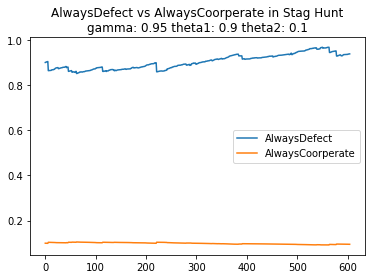

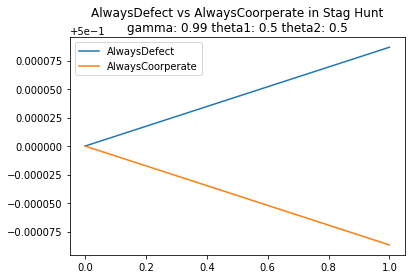

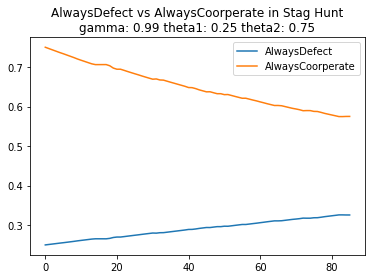

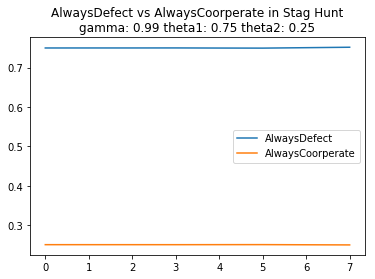

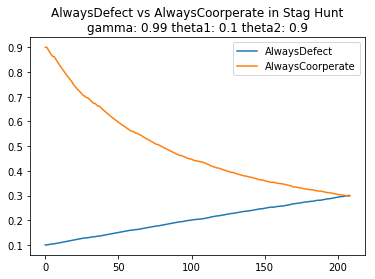

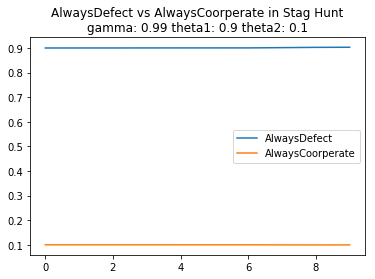

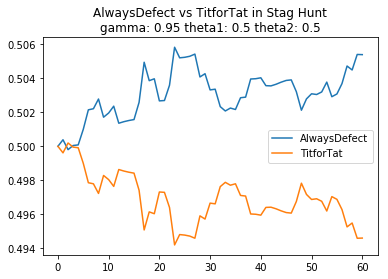

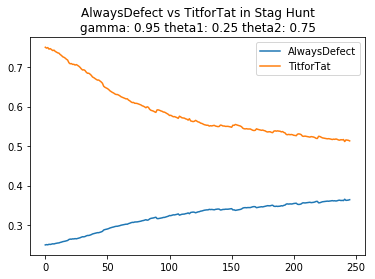

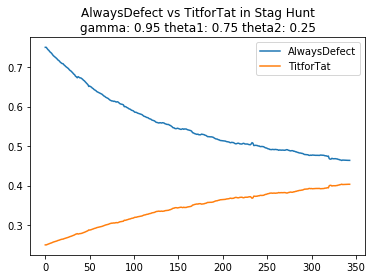

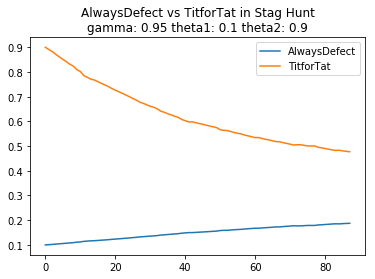

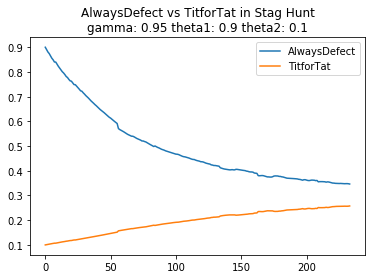

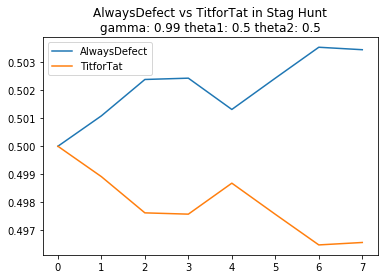

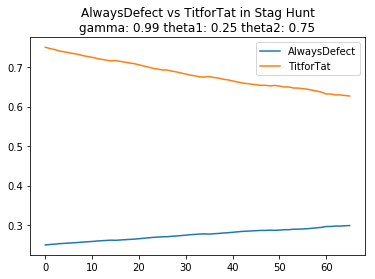

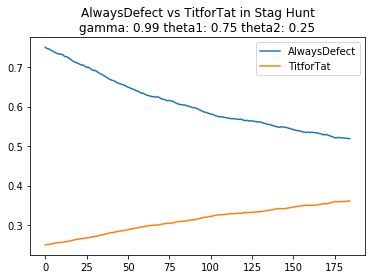

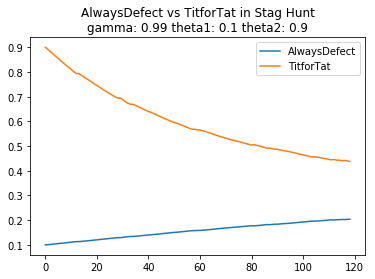

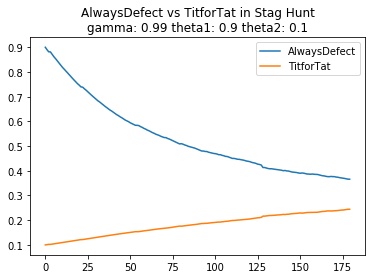

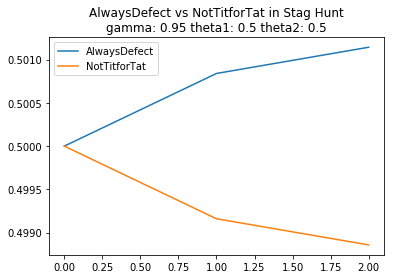

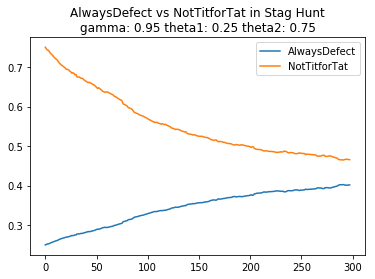

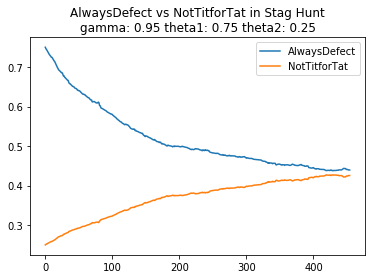

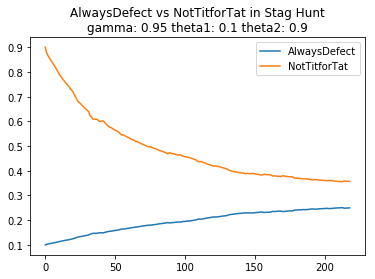

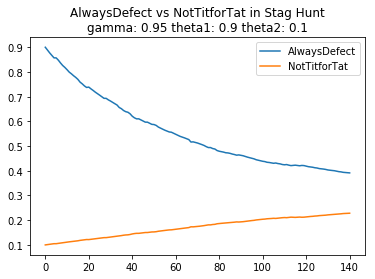

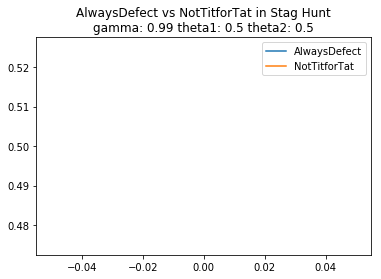

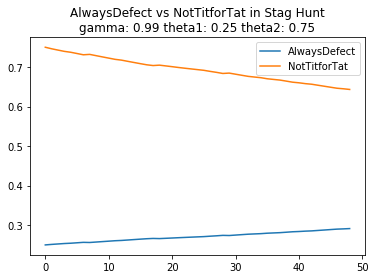

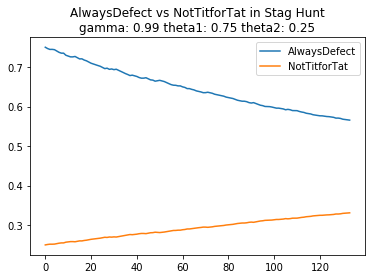

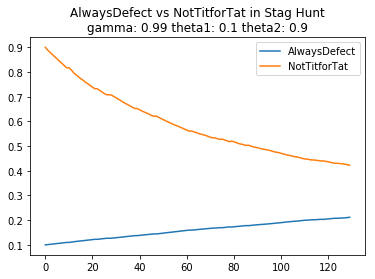

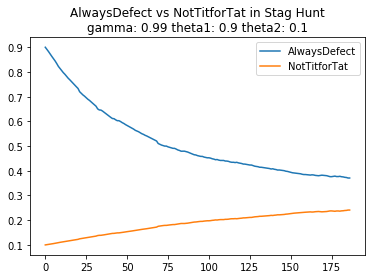

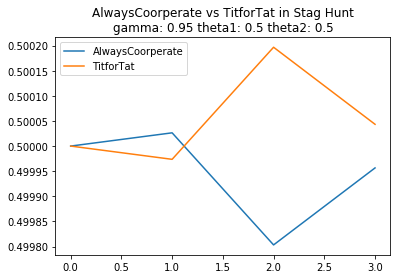

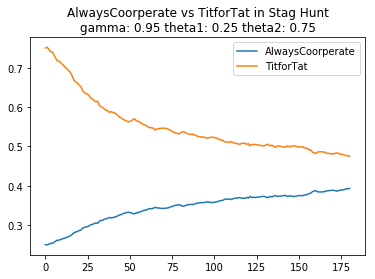

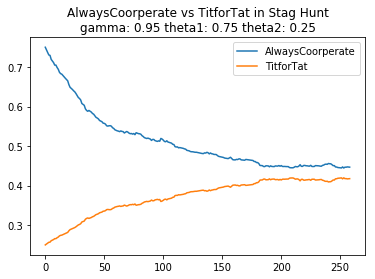

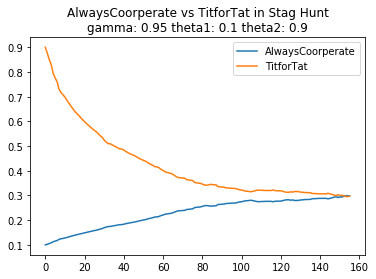

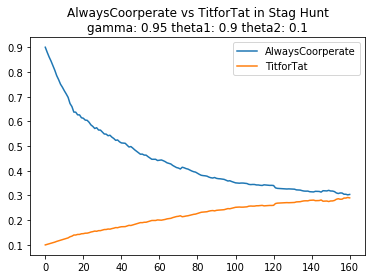

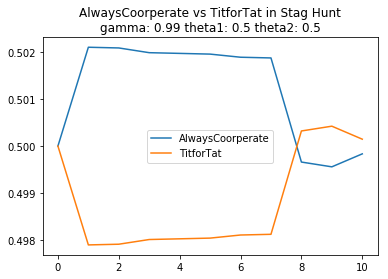

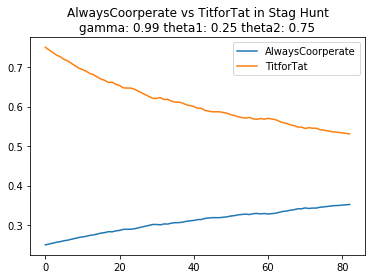

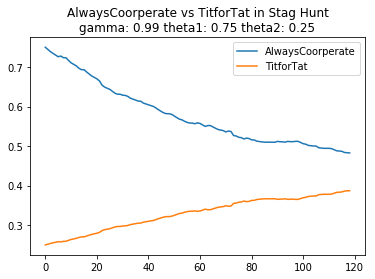

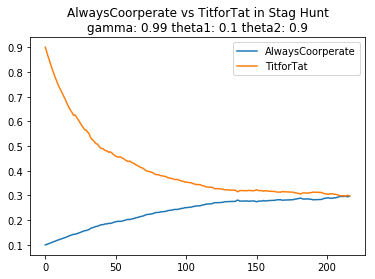

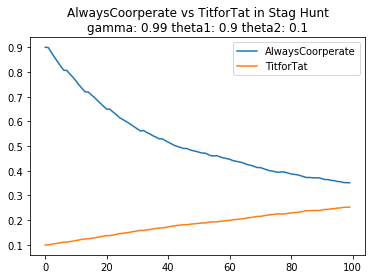

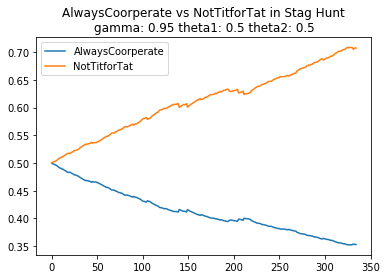

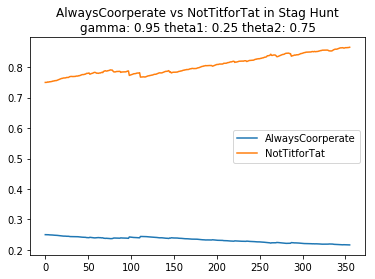

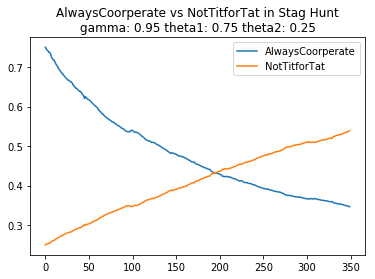

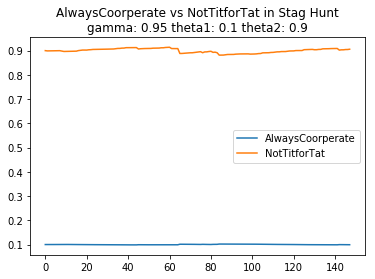

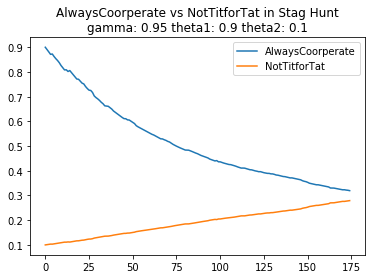

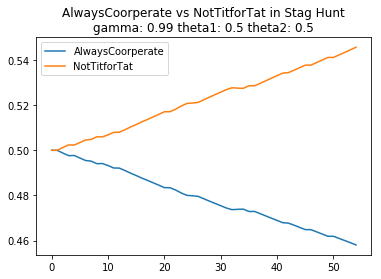

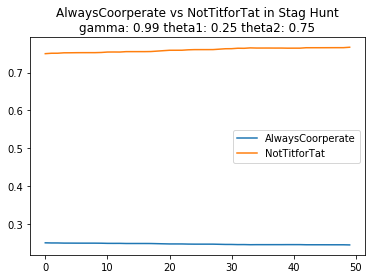

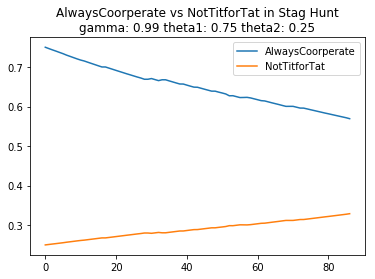

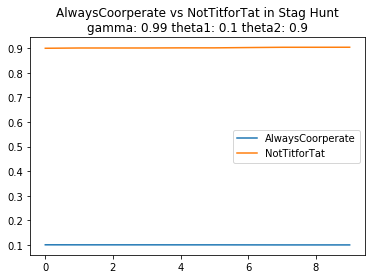

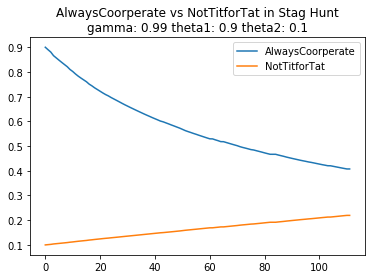

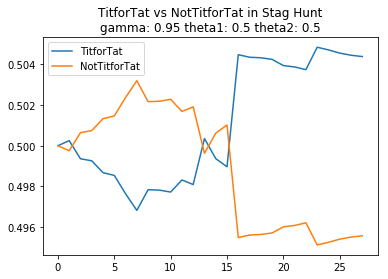

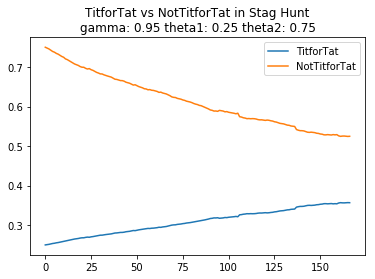

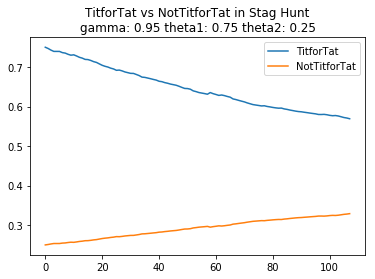

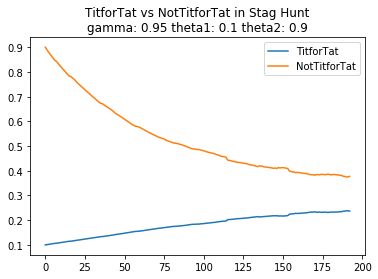

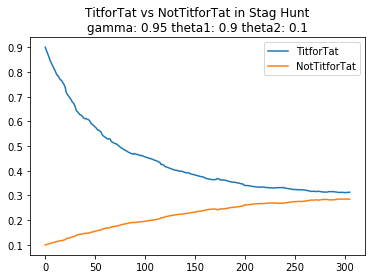

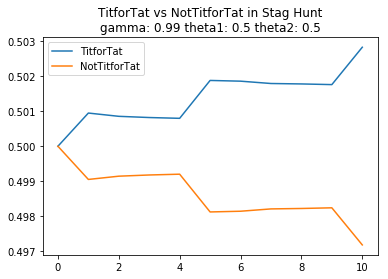

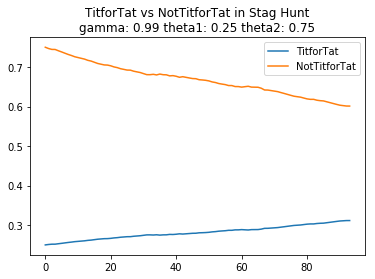

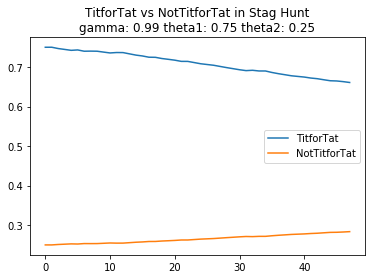

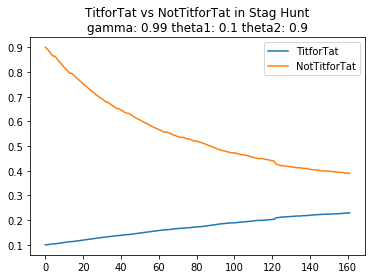

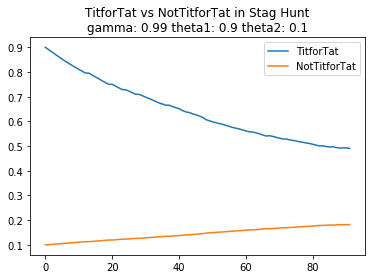

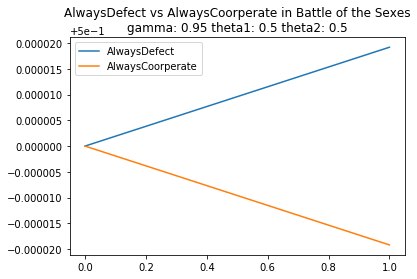

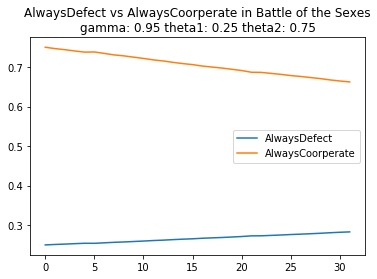

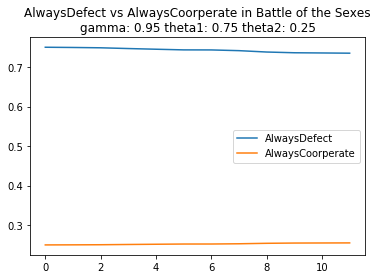

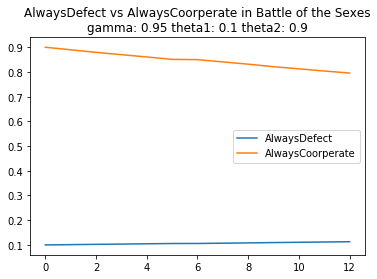

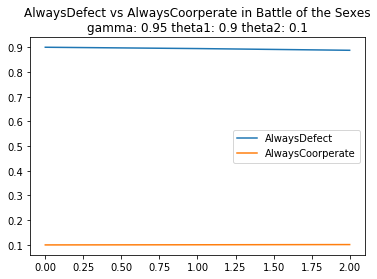

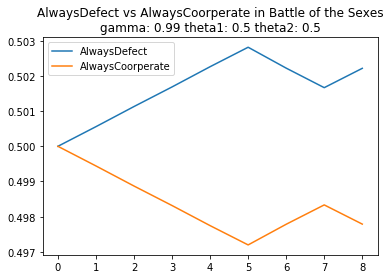

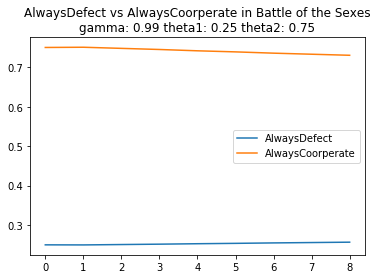

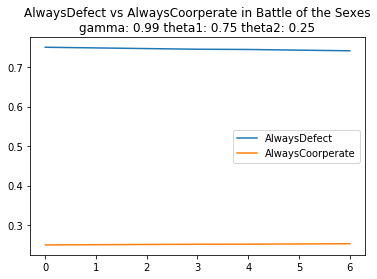

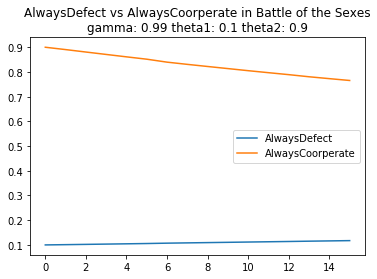

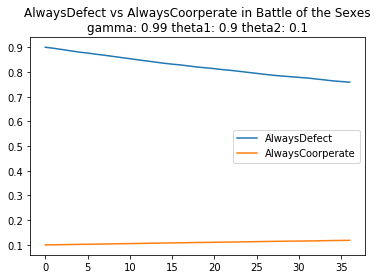

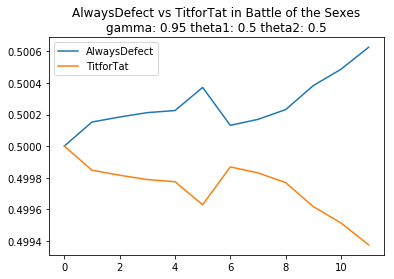

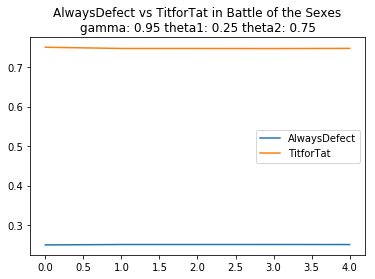

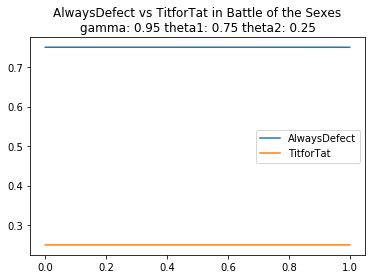

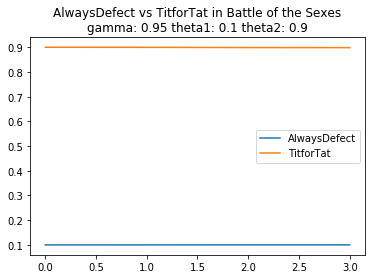

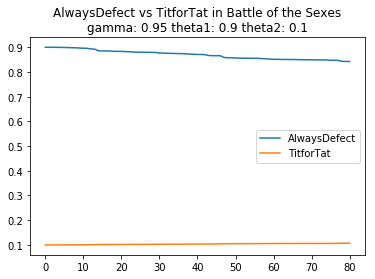

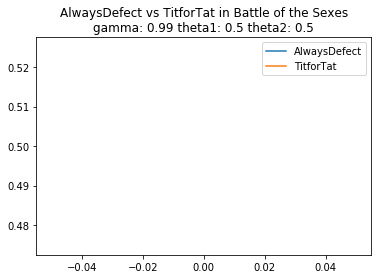

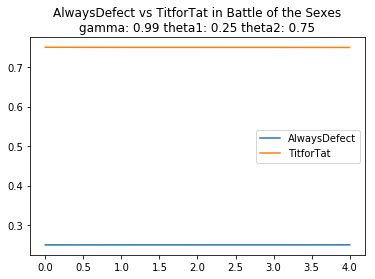

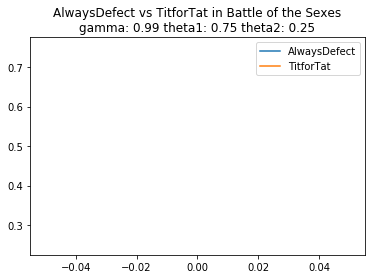

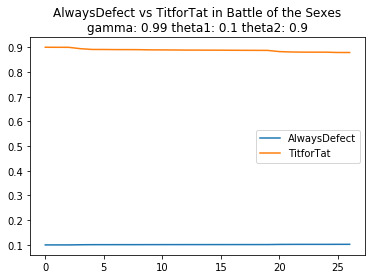

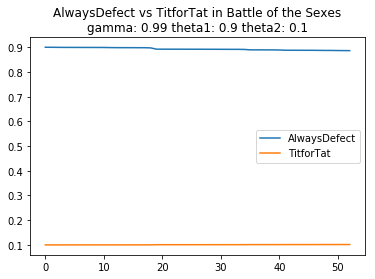

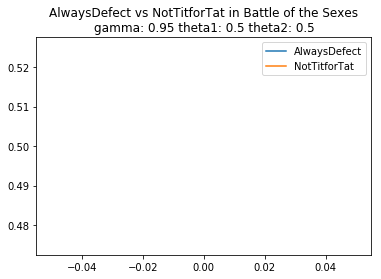

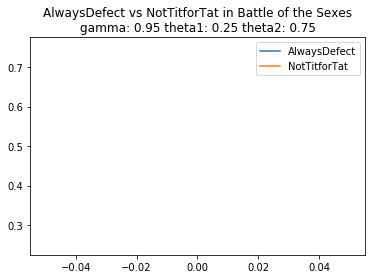

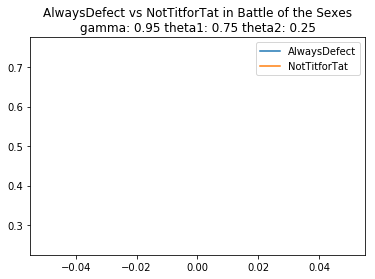

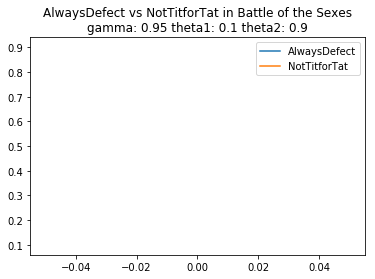

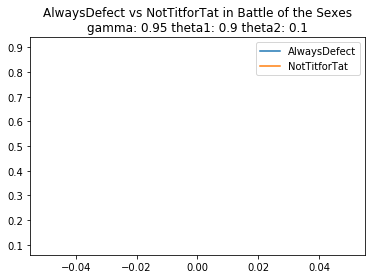

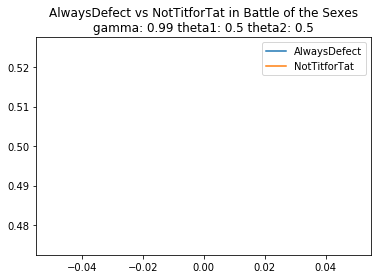

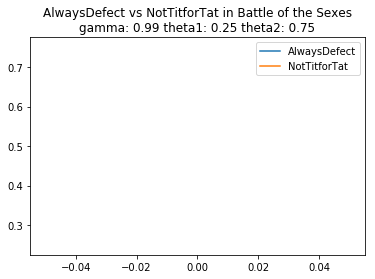

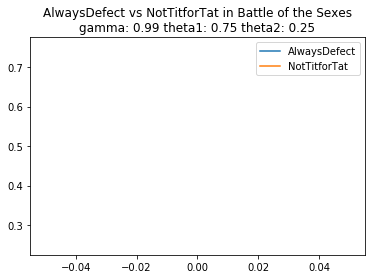

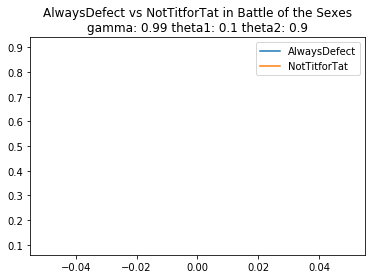

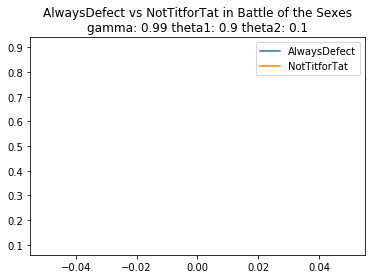

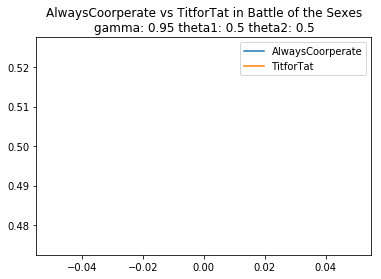

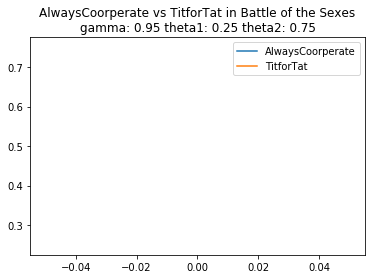

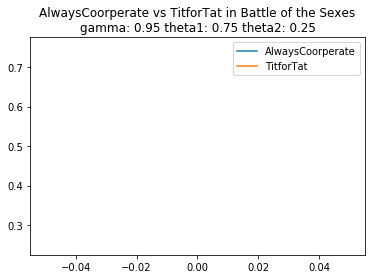

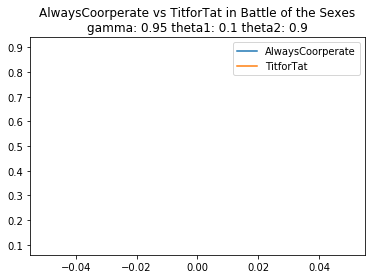

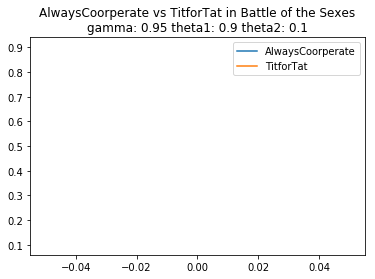

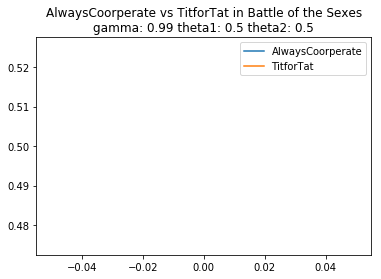

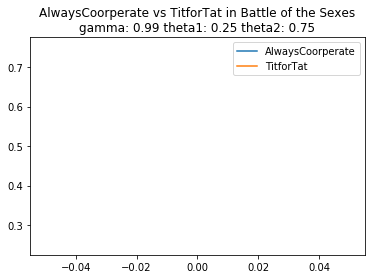

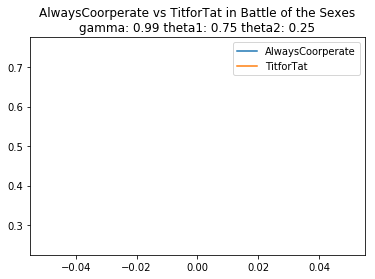

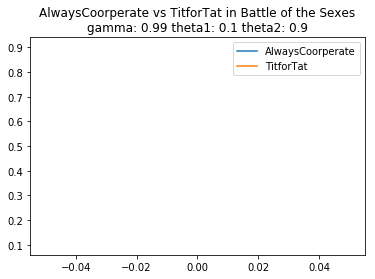

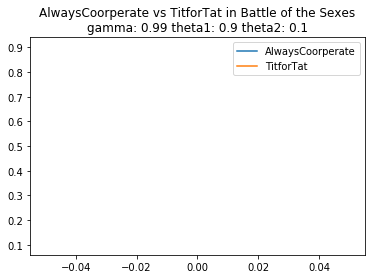

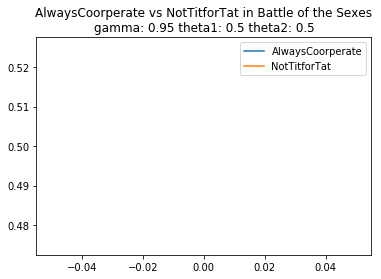

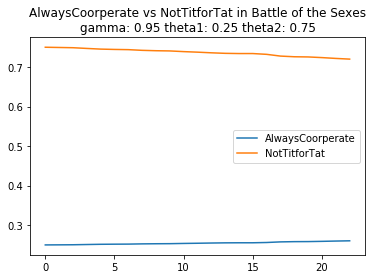

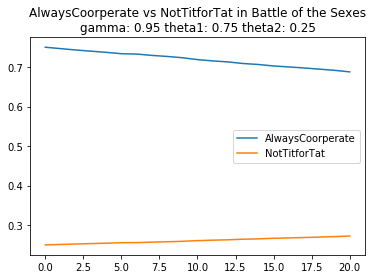

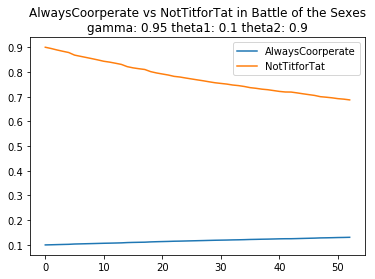

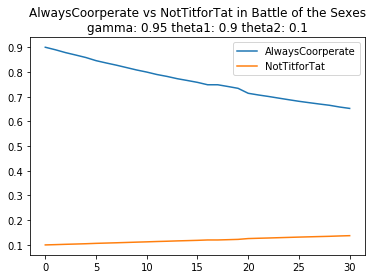

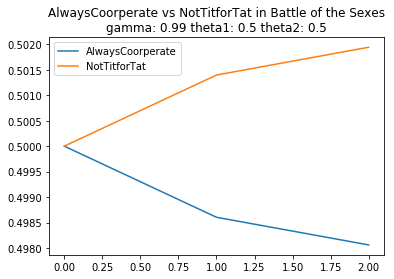

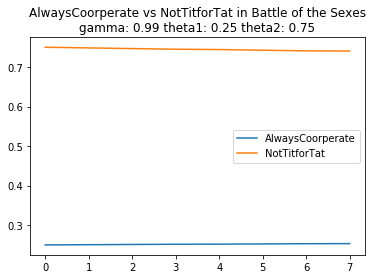

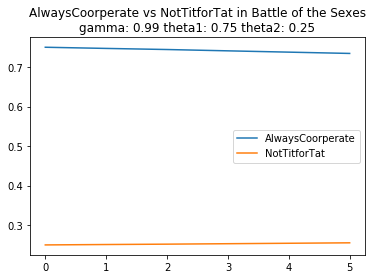

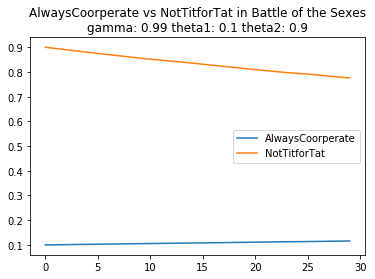

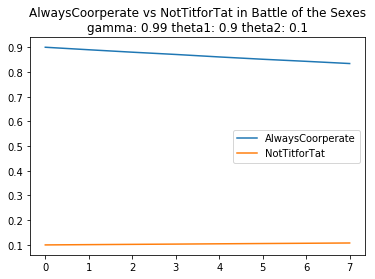

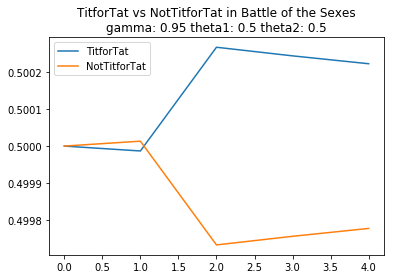

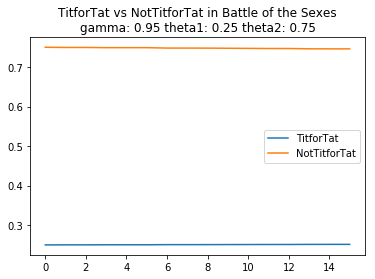

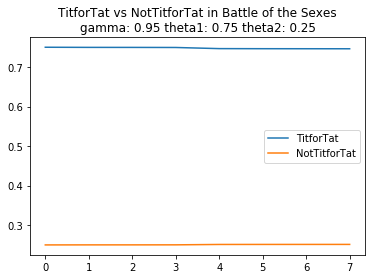

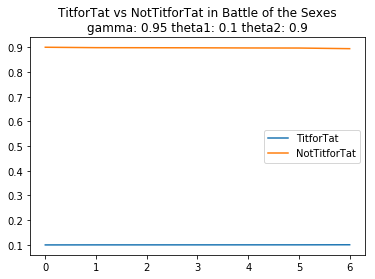

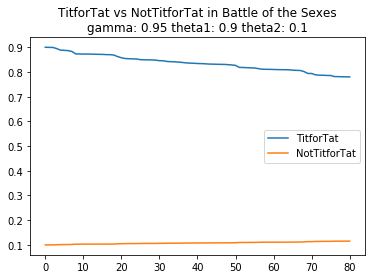

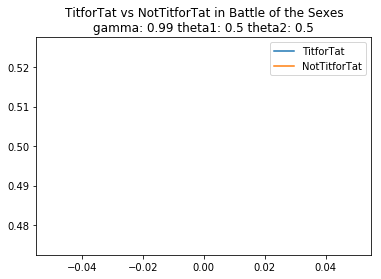

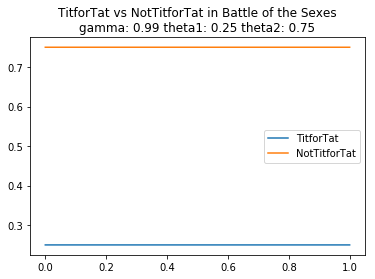

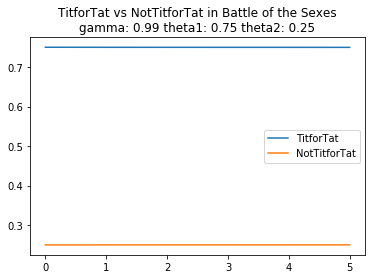

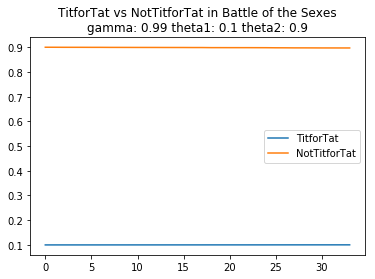

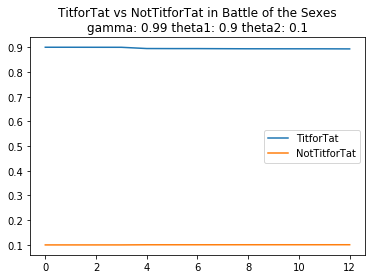

In [51]:
for i in range(180):
    plays = np.array(json.loads(df.iloc[i]['theta_progress']))
    plt.plot(plays[:,0], label=df.iloc[i]['agent1'])
    plt.plot(plays[:,1], label=df.iloc[i]['agent2'])
    plt.title("{} vs {} in {}\ngamma: {} theta1: {} theta2: {}".format(df.iloc[i]["agent1"], df.iloc[i]["agent2"], df.iloc[i]["game"], df.iloc[i]["gamma"], df.iloc[i]["initial_theta1"], df.iloc[i]["initial_theta2"]))
    plt.legend()
    plt.show()

In [ ]:
df['agent1_cat'] = df.agent1.astype("category").cat.codes
df['agent2_cat'] = df.agent2.astype("category").cat.codes
df['game_cat'] = df['agent1_cat'] + df['agent2_cat']

df.head()

y = df['win']
X = df[['game_cat', 'n_plays']]

mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 